# STA130 HW04

# 1.

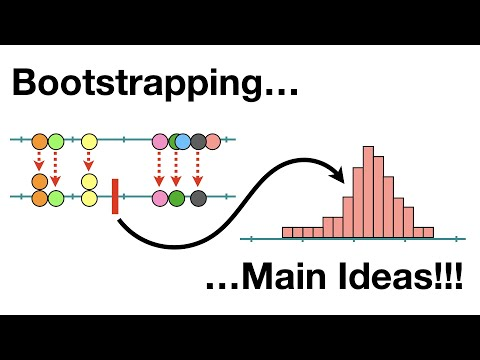

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

Standard deviation: measure how spread out the individual data points from the mean, show the variability of the data set. (ex: how test scores differ from average test score)
Standard error of the mean: reflect the precision of the sample mean, larger sample with give more accurate estimation (ex: indicate how close the sample average socre compares to the true average score)

# 2.

1. Calculate standard error of the mean: compute the standard deviation of the bootstrapped sample means and divide it by the square root of the sample size. This will the standard error of the mean, which estimates the variability of the sample means.
2. Determine the margin of error (multiply the SEM by 1.96 for 95% confidence level)
3. Construct the confidence interval: add and subtract this margin of error from the bootstrapped sample mean. This will the lower and upper bounds of the interval, which should cover 95% of the bootstrapped sample means.

# 3.

1. Generate bootstrap samples: randomly sample with replacement from your original data to create many bootstrap samples
2. Calculate means: compute the mean for each bootstrap sample
3. Sort the the list of bootstrapped means in ascending order
4. Find percentiles: calculate the 2.5th (lower bound) and 97.5th (upper bound) percentiles of the sorted means
5. Construct the confidence interval (the 95% confidence interval is the range between the lower and upper bounds  just calculated)

In [1]:
# Sample From Chatbot

import numpy as np

data = np.array([your_data])  # Replace with your actual data
n_bootstrap_samples = 1000
bootstrap_means = [np.mean(np.random.choice(data, size=len(data), replace=True)) for _ in range(n_bootstrap_samples)]

# Calculate percentiles
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print("95% Bootstrapped Confidence Interval:", (lower_bound, upper_bound))

NameError: name 'your_data' is not defined

# 4.

In [2]:
import numpy as np

# Step 1: Generate a sample dataset
np.random.seed(42)  # Set a seed for reproducibility of random numbers
sample_size = 100  # Define the number of samples to generate
sample_data = np.random.normal(loc=50, scale=10, size=sample_size)  # Normally distributed data with mean (loc) = 50 and standard deviation (scale) = 10

# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, num_bootstrap_samples=1000, confidence_level=0.95, statistic=np.mean):
    # Step 2: Resampling
    # Create bootstrap samples by sampling with replacement from the original dataset
    bootstrap_samples = np.random.choice(data, (num_bootstrap_samples, len(data)), replace=True)
    
    # Calculate the statistic (mean) for each bootstrap sample
    bootstrap_statistics = np.apply_along_axis(statistic, 1, bootstrap_samples)
    
    # Step 3: Calculate the confidence interval
    # Calculate the lower percentile bound of the bootstrap statistics
    lower_bound = np.percentile(bootstrap_statistics, (1 - confidence_level) / 2 * 100)
    # Calculate the upper percentile bound of the bootstrap statistics
    upper_bound = np.percentile(bootstrap_statistics, (confidence_level + (1 - confidence_level) / 2) * 100)
    
    return lower_bound, upper_bound  # Return the confidence interval bounds

# Compute 95% confidence interval for the mean
mean_ci = bootstrap_ci(sample_data, statistic=np.mean)
print(f"95% Bootstrap Confidence Interval for the Mean: {mean_ci}")

# To calculate for the median, change the statistic function
median_ci = bootstrap_ci(sample_data, statistic=np.median)
print(f"95% Bootstrap Confidence Interval for the Median: {median_ci}")


95% Bootstrap Confidence Interval for the Mean: (47.276635751407504, 50.62851486440195)
95% Bootstrap Confidence Interval for the Median: (46.98896304410711, 51.10922589709866)


# 5.

Population Parameter: This is the true value for the entire population. It’s usually unknown. (ex:the average height of all people)
Sample Statistic: This is a value calculated from a smaller group (sample) taken from the population. (ex: the average height of a group of 100 people)

**Why**
1. We use sample statistics to estimate population parameters since we can’t measure everyone.
2. Confidence intervals show the range where we think the population parameter lies, based on our sample. They help us understand how reliable our estimate is.
3. Knowing the difference helps us interpret results accurately and make better decisions based on sample data.

# 6.

Bootstrapping is a statistical technique.
If we think the average height of all girls in our school is 5'3". We can start with a sample of students from our school and measure their heights, we say we will take 100 bootstrap samples of the same size as the original sample. Then, we can use bootstrapping to create a bunch of new samples from that original data. For each of these samples, we calculate the average height. After that, we will have a bunch of average heights from your bootstrap samples. We can then see how many of those averages are around our guess of 5'3". If a lot of those averages fall near 5'3", our guess might be plausible. But if most of them are far from that, it might mean our guess isn’t quite right. Bootstrapping helps us check our assumptions using just our sample. That’s pretty useful!

# 7.

**Overlapping Zero**
If the confidence interval includes zero (like from -4 to 4), it suggests that there is a possibility that the drug has no effect at all. In other words, it might help some people, hurt others, or do nothing for others.
Because of this overlap with zero, we say we "fail to reject the null hypothesis." The null hypothesis is a statement that says there is no effect or no difference (in this case, that the drug doesn't work).

**Does Not Include Zero**
If the confidence interval does not include zero (for example, from 1 to 4), it suggests that the drug is likely effective since the entire range is above zero. This means we can be more confident that the drug has a real effect.
When this happens, we say we can "reject the null hypothesis" because we have strong evidence that the drug works.

# 8.

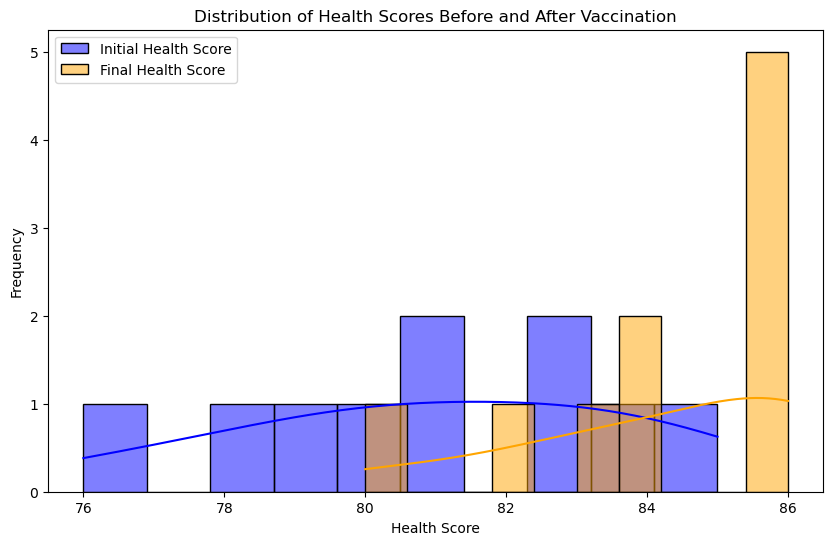

Observed Difference: 3.30
95% Confidence Interval: [1.2 5.4]
Reject the null hypothesis: The vaccine is effective.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a seed for reproducibility
np.random.seed(42)

# Step 1: Load the data
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}
df = pd.DataFrame(data)

# Step 2: Data Visualization
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['InitialHealthScore'], color='blue', label='Initial Health Score', kde=True, bins=10, ax=ax)
sns.histplot(df['FinalHealthScore'], color='orange', label='Final Health Score', kde=True, bins=10, ax=ax)
ax.set_title('Distribution of Health Scores Before and After Vaccination')
ax.set_xlabel('Health Score')
ax.set_ylabel('Frequency')
ax.legend()

# Save the figure as a PNG file
plt.savefig('health_scores_distribution.png', format='png', dpi=300)
plt.show()

# Step 3: Quantitative Analysis
# Bootstrapping to evaluate the effect of the vaccine
def bootstrap_mean_diff(data1, data2, n_iterations=10000):
    observed_diff = data2.mean() - data1.mean()
    bootstrap_diffs = []
    
    for _ in range(n_iterations):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        bootstrap_diffs.append(sample2.mean() - sample1.mean())
    
    return observed_diff, bootstrap_diffs

initial_scores = df['InitialHealthScore']
final_scores = df['FinalHealthScore']

observed_diff, bootstrap_diffs = bootstrap_mean_diff(initial_scores, final_scores)

# Step 4: Confidence Interval
conf_interval = np.percentile(bootstrap_diffs, [2.5, 97.5])
print(f"Observed Difference: {observed_diff:.2f}")
print(f"95% Confidence Interval: {conf_interval}")

# Step 5: Findings and Discussion
if conf_interval[0] > 0:
    conclusion = "Reject the null hypothesis: The vaccine is effective."
else:
    conclusion = "Fail to reject the null hypothesis: No evidence the vaccine is effective."

print(conclusion)


# 9.

Yes.

# Chatbot Summary

**1.**
https://chatgpt.com/share/66fac7c6-1600-800c-89e4-adb33f209e3e
In this session, we discussed two important statistical concepts:
1. **Standard Deviation**: It measures how spread out data points are from the mean, with a higher standard deviation indicating more spread or variability in the data.

2. **Standard Error of the Mean (SEM)**: It estimates the variability of the sample mean compared to the true population mean. SEM decreases as sample size increases, indicating more precise estimates of the population mean.

Both are key concepts in understanding the spread and accuracy of data in statistics.

**2.**
https://chatgpt.com/share/66fac9af-9248-800c-b1b1-e13e70d2dd5b
Here’s a summary of our session:
1. **Standard Error of the Mean (SEM)**:
   - The SEM is used to estimate the variability of sample means. It is calculated by dividing the standard deviation of bootstrapped sample means by the square root of the sample size.

2. **95% Confidence Interval**:
   - To create a 95% confidence interval, multiply the SEM by **1.96** (the critical value for a 95% confidence level from the standard normal distribution) and then add and subtract this margin of error from the bootstrapped sample mean.

3. **Critical Values**:
   - The critical value (e.g., 1.96) represents the Z-score corresponding to the desired confidence level in a normal distribution.
   - For different confidence levels, the critical values are approximately **1.645** for 90% and **2.576** for 99% confidence.
   - When using the **t-distribution** (typically for small sample sizes), the critical value depends on the sample size (degrees of freedom).
   - For non-normally distributed data or small sample sizes, bootstrapping can be used to estimate confidence intervals directly.

This summary encapsulates the key points discussed about constructing confidence intervals and the critical values used in various statistical situations. Let me know if you need more details on any specific topic!

**3.**
https://chatgpt.com/share/66facdf5-a4ac-800c-9920-66944657788e
Here's a summary of our session:

1. **Confidence Intervals**: We discussed how to create a 95% bootstrapped confidence interval using bootstrapped means, emphasizing that this approach does not rely on the standard error or standard deviation.

2. **Steps for Creation**:
   - Generate multiple bootstrap samples from your original data.
   - Calculate the means of these bootstrap samples.
   - Sort the bootstrapped means.
   - Determine the 2.5th and 97.5th percentiles to find the confidence interval bounds.
   - Construct the confidence interval from these bounds.

3. **Example Code**: I provided a simple Python code snippet to illustrate how to implement this method programmatically.

4. **Summary of Method**: This method offers a robust way to estimate uncertainty without relying on assumptions about the data's distribution.

If you have any further questions or need clarification on any points, feel free to ask!

**4.**
https://chatgpt.com/share/66fad0f6-cdc8-800c-a84d-dc04bcbb565d
In this session, we focused on calculating bootstrap confidence intervals for different population parameters using Python. Here’s a summary of the key points discussed:

1. **Bootstrap Confidence Interval**:
   - A statistical method used to estimate the distribution of a statistic (like the mean or median) by resampling the data with replacement.

2. **Code Overview**:
   - We generated a sample dataset of 100 data points from a normal distribution.
   - A function `bootstrap_ci` was created to calculate the bootstrap confidence interval for a specified statistic, defaulting to the mean.
   - The function included steps for:
     - Resampling the data multiple times.
     - Calculating the desired statistic for each bootstrap sample.
     - Computing the confidence interval based on percentiles.

3. **Modification for Different Statistics**:
   - The code can easily be adapted to calculate confidence intervals for different statistics (e.g., the median) by changing the `statistic` parameter when calling the `bootstrap_ci` function.

4. **Example Output**:
   - The code produced sample output showing the 95% bootstrap confidence intervals for both the mean and median of the dataset.

This approach provides flexibility in estimating confidence intervals for various population parameters, which can be particularly useful in statistical analysis. If you have any further questions or need more assistance, feel free to ask!

**5.**
https://chatgpt.com/share/66fadf06-1d84-800c-af69-006155ef2481
Here's a summary of our discussion about the distinction between population parameters and sample statistics in the context of confidence intervals:

1. **Definitions**:
   - **Population Parameter**: A characteristic of an entire population, typically unknown.
   - **Sample Statistic**: A measure calculated from a sample that estimates the population parameter.

2. **Purpose of Confidence Intervals**:
   - Used to estimate the range in which a population parameter likely falls based on sample statistics.
   - Provides a measure of uncertainty about the estimate due to sampling error.

3. **Relation Between the Two**:
   - Sample statistics have a sampling distribution that allows probabilistic statements about the population parameter.
   - Different samples yield different statistics, highlighting the importance of considering variability.

4. **Interpretation**:
   - Confidence intervals are associated with a confidence level (e.g., 95%), indicating the reliability of the estimate.

5. **Decision-Making**:
   - Understanding the distinction aids in interpreting confidence intervals and making informed decisions based on sample data.

This framework helps in understanding how we draw inferences from sample data to make conclusions about a larger population.

**7.**
https://chatgpt.com/share/66faecfa-bd38-800c-b750-2dc1375dbb00
In this session, we discussed the concept of confidence intervals and their relationship to hypothesis testing, specifically focusing on how a confidence interval that overlaps zero leads to "failing to reject the null hypothesis." We clarified that this means we cannot conclude there is an effect of the drug, even if the sample mean isn't zero. We also outlined that to reject the null hypothesis, the confidence interval must not include zero, indicating a statistically significant effect. The explanations were simplified for clarity.

**8.**
https://chatgpt.com/share/66faf158-d8d8-800c-af45-455699a5d0f5
Summary of Vaccine Data Analysis Assignment Session

In this session, we structured a comprehensive approach for analyzing vaccine data provided by AliTech. The analysis aims to evaluate the effectiveness of a new vaccine by comparing health scores before and after vaccination. 

**Key Components:**

1. **Problem Introduction**: The study focuses on assessing whether the vaccine improves health outcomes, framed by the primary research question.

2. **Null Hypothesis**: Defined the null hypothesis (H0) as "no effect of the vaccine on health scores," with the alternative hypothesis (H1) proposing a positive effect.

3. **Data Visualization**: Suggested visualizations using histograms to illustrate the distribution of initial and final health scores, facilitating a visual comparison.

4. **Quantitative Analysis**: Introduced bootstrapping as a method to analyze the mean difference in health scores. A Python function was created to perform this analysis and calculate the confidence interval.

5. **Methodology Code**: Provided sample Python code that includes data loading, visualization, bootstrapping, and concluding the analysis regarding the null hypothesis.

6. **Findings and Discussion**: Summarized the conclusions drawn from the bootstrapping analysis, indicating whether the null hypothesis could be rejected based on the confidence interval results.

7. **Further Considerations**: Discussed the importance of documenting findings, interpreting results, and considering limitations for future research.

Overall, the session outlined a structured methodology for analyzing vaccine effectiveness, incorporating statistical analysis and visualizations to support the conclusions.